### Steps to Implement KNN for Brain Tumor Classification

1. **Preprocess the images**:
   - Load the images from the dataset.
   - Resize the images to a uniform size (e.g., 128x128 pixels) to ensure consistency.
   - Convert the images into a numerical format that the KNN algorithm can process.

2. **Create labels**:
   - Each image corresponds to one of the four classes of brain tumors.
   - Assign a label to each image based on its class (e.g., glioma_tumor, meningioma_tumor, no_tumor, or pituitary_tumor).

3. **Flatten the images**:
   - Since KNN works with numerical arrays (not multi-dimensional images), convert each image into a 1D vector. This means flattening the 2D image data into a single array of pixel values.

4. **Train the KNN classifier**:
   - Use the `KNeighborsClassifier` from the `scikit-learn` library to train the KNN model on the preprocessed images.
   - Specify the number of neighbors (`n_neighbors`) for the KNN model, which controls how many neighbors are considered when classifying new data points.

5. **Evaluate the model**:
   - After training the model, evaluate its performance using a validation set or test set.
   - Measure the accuracy and other metrics (e.g., precision, recall, F1-score) to assess how well the model performs on unseen data.


In [29]:
# pip install tensorflow

import os
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, accuracy_score
from tensorflow.keras.preprocessing.image import ImageDataGenerator, img_to_array, load_img

base_dir = '/home/ec2-user/SageMaker/ML-Algorithm-Benchmarks/data/brain_tumor/Training'


In [34]:
image_size = [128, 128]

data = []
labels = []
image_paths =[]

In [35]:
class_names = ['glioma_tumor', 'meningioma_tumor', 'no_tumor', 'pituitary_tumor']

In [36]:
# Load the images, preprocess them, and store their paths
for label in class_names:
    label_dir = os.path.join(base_dir, label)
    for image_file in os.listdir(label_dir):
        image_path = os.path.join(label_dir, image_file)
        image = load_img(image_path, target_size=image_size)  # Resize images
        image = img_to_array(image)  # Convert image to numpy array
        image = image.flatten()  # Flatten image to 1D array
        data.append(image)
        labels.append(class_names.index(label))  # Convert label to numeric
        image_paths.append(image_path)  # Store the image path

# Convert data and labels to numpy arrays
data = np.array(data)
labels = np.array(labels)


In [32]:
print(data[10])

[0. 0. 0. ... 0. 0. 0.]


In [37]:
from sklearn.model_selection import cross_val_score


# Split data, labels, and image_paths into training and test sets
X_train, X_test, y_train, y_test, paths_train, paths_test = train_test_split(
    data, labels, image_paths, test_size=0.2, random_state=42, stratify=labels
)
knn = KNeighborsClassifier(n_neighbors=5)

cv_scores = cross_val_score(knn, data, labels, cv=5, scoring='accuracy')


print(f"Cross-validation accuracy scores:{cv_scores}")
print(f"Mean cross-validation accuracy:{cv_scores.mean()}")
print(f"Standard deviation of cross-validation accuracy:{cv_scores.std()}")


Cross-validation accuracy scores:[0.77874564 0.78222997 0.80313589 0.81010453 0.78745645]
Mean cross-validation accuracy:0.7923344947735191
Standard deviation of cross-validation accuracy:0.012190143334171344



Test Set Evaluation:
Accuracy: 0.7892
Classification Report:
                  precision    recall  f1-score   support

    glioma_tumor       0.71      0.90      0.79       165
meningioma_tumor       0.83      0.55      0.66       165
        no_tumor       0.72      0.72      0.72        79
 pituitary_tumor       0.88      0.96      0.92       165

        accuracy                           0.79       574
       macro avg       0.79      0.78      0.77       574
    weighted avg       0.80      0.79      0.78       574



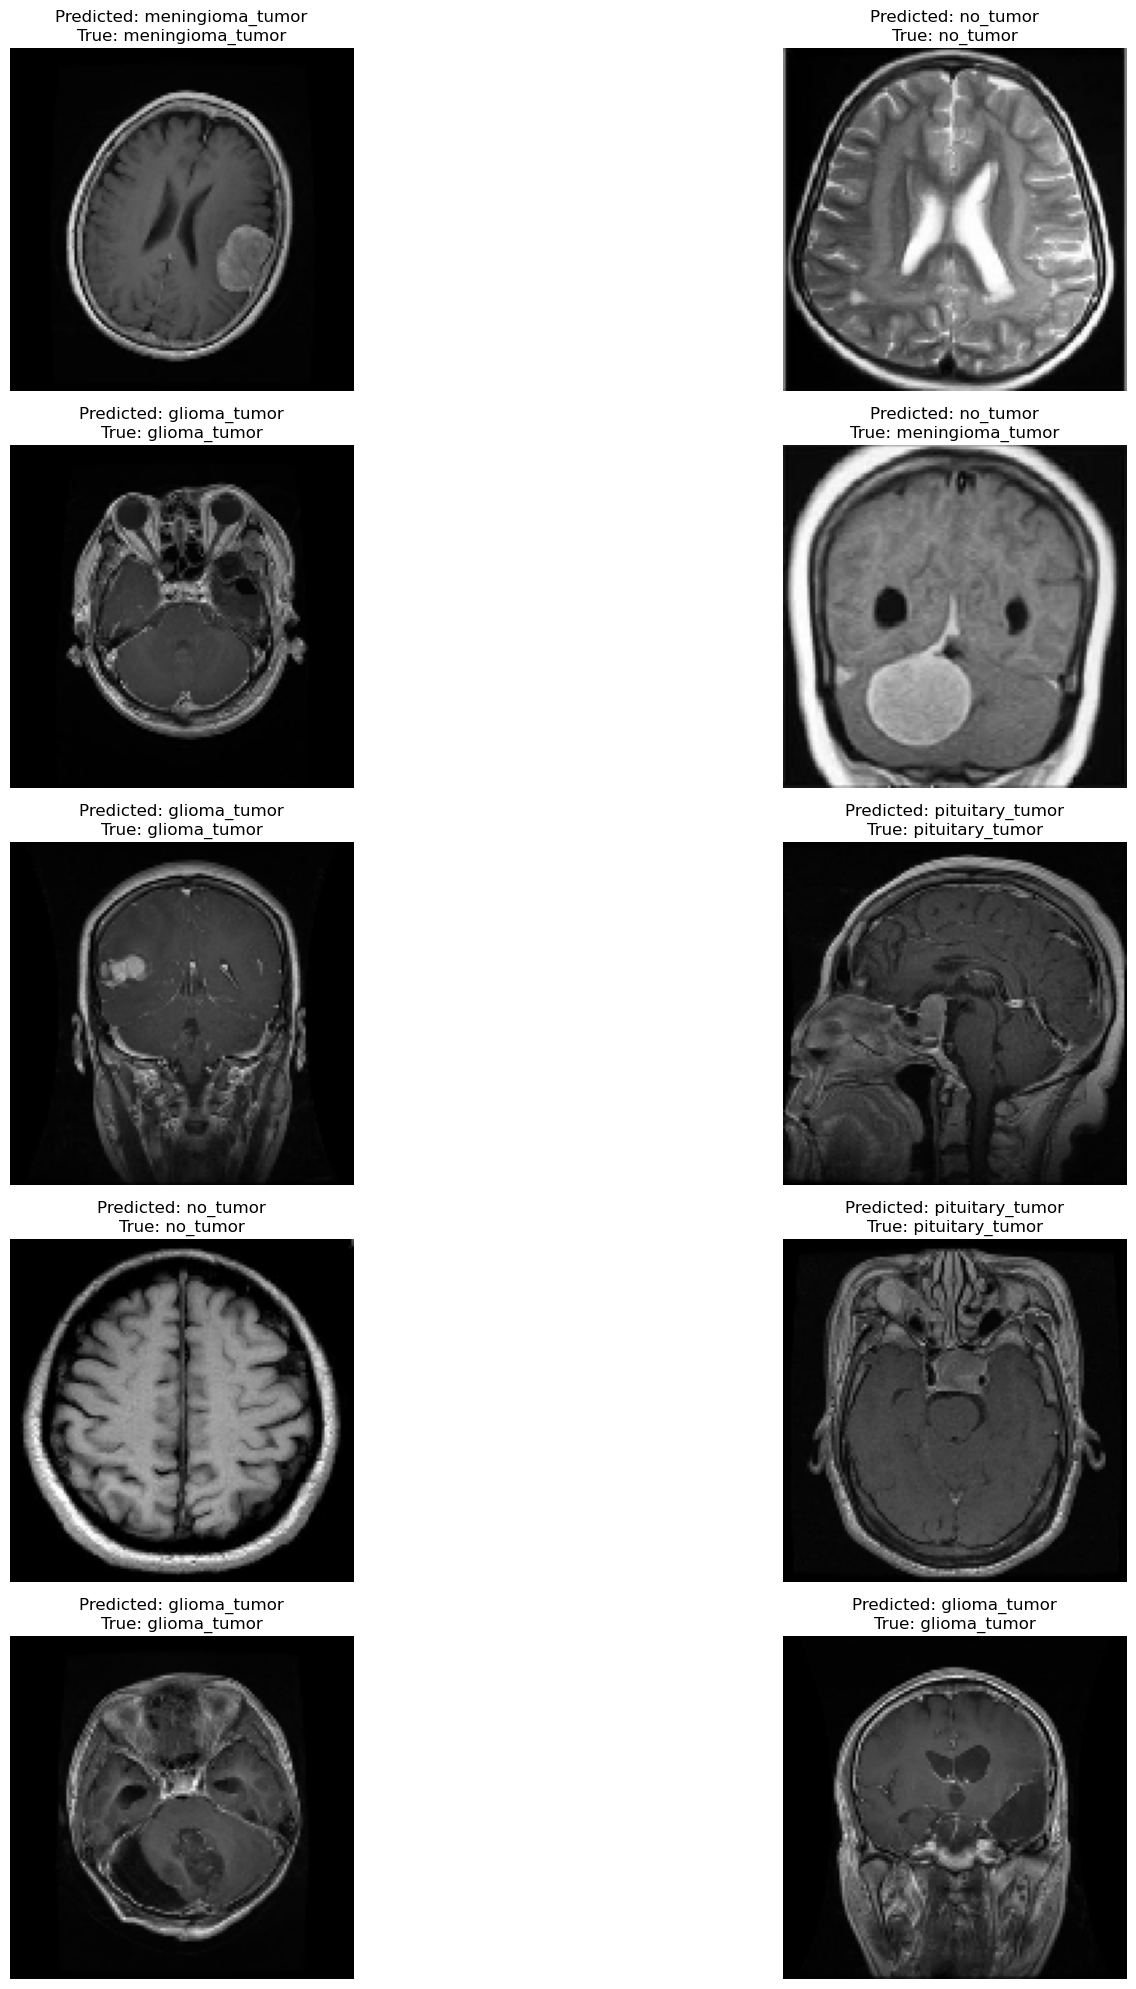

In [38]:
import matplotlib.pyplot as plt

knn.fit(X_train, y_train)

# Evaluate the model on the test set
y_pred = knn.predict(X_test)
print("\nTest Set Evaluation:")
print(f"Accuracy: {accuracy_score(y_test, y_pred):.4f}")
print("Classification Report:")
print(classification_report(y_test, y_pred, target_names=class_names))

# Function to display images and predictions
def display_images_and_predictions(model, image_paths, true_labels, class_names, num_images=10):
    plt.figure(figsize=(20, 20))
    for i in range(num_images):
        # Load image
        image_path = image_paths[i]
        try:
            image = load_img(image_path, target_size=image_size)
            image_array = img_to_array(image)
            image_flatten = image_array.flatten().reshape(1, -1)  # Flatten image for KNN

            # Predict the class
            prediction = model.predict(image_flatten)
            predicted_label = class_names[int(prediction[0])]
            true_label = class_names[int(true_labels[i])]

            # Display image and prediction
            plt.subplot(5, 2, i + 1)
            plt.imshow(image)
            plt.title(f'Predicted: {predicted_label}\nTrue: {true_label}')
            plt.axis('off')
        except Exception as e:
            print(f"Error processing image {image_path}: {e}")
    
    plt.tight_layout()
    plt.show()

# Display images and predictions for the first 10 test images
display_images_and_predictions(knn, paths_test, y_test, class_names, num_images=10)